In [1]:
import numpy as np

import pytz
import datetime

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon, get_body, solar_system_ephemeris

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
from astropy import constants

R_matahari = constants.R_sun
R_bulan = 1737.1 * u.km

def ukuran_tampak(R, jarak):
    return (R/jarak).to(u.arcmin, u.dimensionless_angles())

In [3]:
def matahariBulan(waktu, lokasi):
    altAzframe = AltAz(obstime=waktu, location=lokasi)
    matahariAltAz = get_body('sun', waktu, lokasi).transform_to(altAzframe)
    bulanAltAz = get_body('moon', waktu, lokasi).transform_to(altAzframe)
    separasi = matahariAltAz.separation(bulanAltAz)
    
    return separasi, matahariAltAz, bulanAltAz

In [4]:
solar_system_ephemeris.set('de430')

<ScienceState solar_system_ephemeris: 'de430'>

In [5]:
#penyengat  = EarthLocation.of_address('pulau penyengat')
penyengat = EarthLocation.from_geodetic(lon=104.4178*u.deg, lat=0.9283*u.deg)
tz = pytz.timezone('Asia/Jakarta')
waktu_tebakan = Time(tz.localize(datetime.datetime(2019, 12, 26, 12, 26, 0)))

In [6]:
penyengat.lat, penyengat.lon

(<Latitude 0.9283 deg>, <Longitude 104.4178 deg>)

Text(0.5, 0, 'Waktu(UTC)')

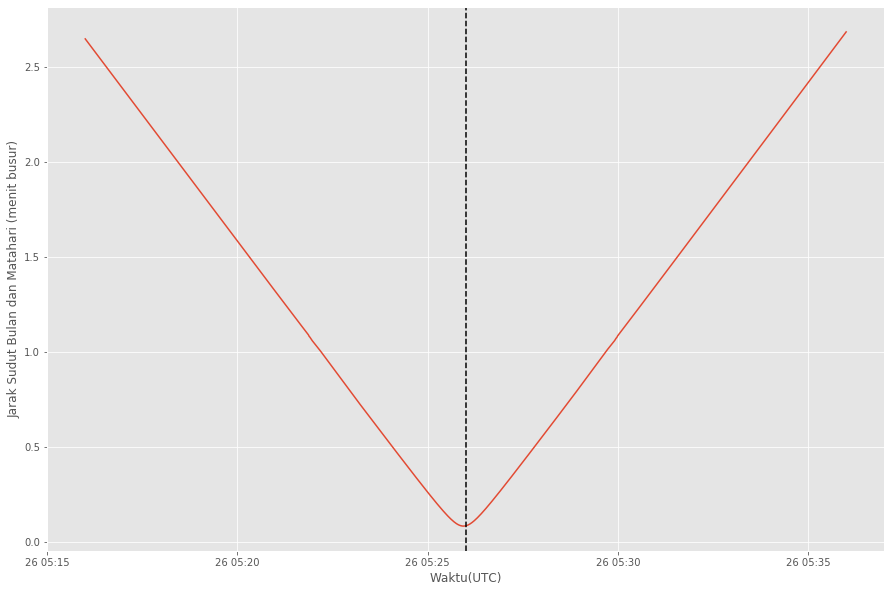

In [20]:
rentangWaktu = waktu_tebakan + np.linspace(-10, 10, 1000)*u.min

separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)

plt.figure(figsize=(15, 10))
plt.plot_date(rentangWaktu.plot_date, separasi.arcmin, fmt='-')
plt.axvline(waktu_tebakan.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)')
plt.xlabel('Waktu(UTC)')

# Puncak Gerhana

In [21]:
puncakGerhana = rentangWaktu[np.argmin(separasi.arcmin)]
puncakGerhana

<Time object: scale='utc' format='datetime' value=2019-12-26 05:25:56.996997>

# Fase Gerhana

(0, 2.6866230372353903)

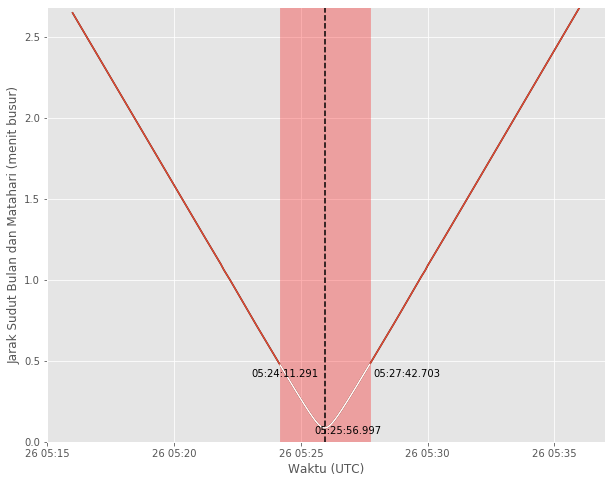

In [22]:
sep = separasi
puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]

ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)
ukuranMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)

cincin = sep < (ukuranMatahari - ukuranBulan)
sebagian = sep <= (ukuranMatahari + ukuranBulan)

plt.figure(figsize=(10, 8))
plt.axvline(puncakGerhana.plot_date, c='k', ls='--')
plt.axvspan(rentangWaktu.plot_date[cincin].min(), rentangWaktu.plot_date[cincin].max(), color='red', alpha=0.3)
plt.plot_date(rentangWaktu.plot_date, sep.arcmin, fmt='-', c='k')
plt.plot_date(rentangWaktu.plot_date[sebagian], sep.arcmin[sebagian], fmt='-')
plt.plot_date(rentangWaktu.plot_date[cincin], sep.arcmin[cincin], fmt='-', color='white')
plt.text(rentangWaktu.plot_date[cincin].min()-0.0008, 0.4, np.min(rentangWaktu[cincin]).strftime('%H:%M:%S.%f'))
plt.text(rentangWaktu.plot_date[cincin].max()+0.0001, 0.4, np.max(rentangWaktu[cincin]).strftime('%H:%M:%S.%f'))
plt.text(puncakGerhana.plot_date-0.0003, 0.05, puncakGerhana.strftime('%H:%M:%S.%f'))
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)')
plt.xlabel('Waktu (UTC)')
plt.ylim(0, sep.arcmin[-1])

(0, 60.82834791902006)

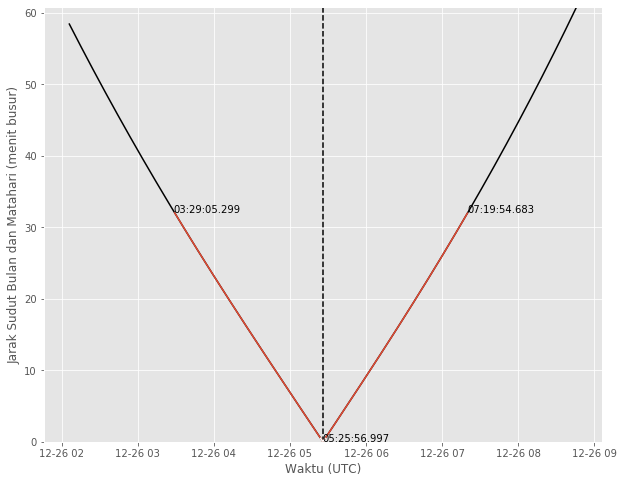

In [100]:
rentangWaktu = waktu_tebakan + np.linspace(-200, 200, 10000)*u.min

separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)
sep = separasi
ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)
ukuranMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)

cincin = sep < (ukuranMatahari - ukuranBulan)
sebagian = sep <= (ukuranMatahari + ukuranBulan)

plt.figure(figsize=(10, 8))
plt.axvline(puncakGerhana.plot_date, c='k', ls='--')
#plt.axvspan(rentangWaktu.plot_date[cincin].min(), rentangWaktu.plot_date[cincin].max(), color='red', alpha=0.3)
plt.plot_date(rentangWaktu.plot_date, sep.arcmin, fmt='-', c='k')
plt.plot_date(rentangWaktu.plot_date[sebagian], sep.arcmin[sebagian], fmt='-')
plt.plot_date(rentangWaktu.plot_date[cincin], sep.arcmin[cincin], fmt='-', color='white')
plt.text(rentangWaktu.plot_date[sebagian].min()-0.0008, 32, np.min(rentangWaktu[sebagian]).strftime('%H:%M:%S.%f'))
plt.text(rentangWaktu.plot_date[sebagian].max()+0.0001, 32, np.max(rentangWaktu[sebagian]).strftime('%H:%M:%S.%f'))
plt.text(puncakGerhana.plot_date-0.0003, 0.05, puncakGerhana.strftime('%H:%M:%S.%f'))
plt.ylabel('Jarak Sudut Bulan dan Matahari (menit busur)')
plt.xlabel('Waktu (UTC)')
plt.ylim(0, sep.arcmin[-1])

# Kontak 1

In [33]:
np.min(rentangWaktu[sebagian])

<Time object: scale='utc' format='datetime' value=2019-12-26 03:29:05.298530>

# Kontak 4

In [34]:
np.max(rentangWaktu[sebagian])

<Time object: scale='utc' format='datetime' value=2019-12-26 07:19:54.683468>

# Durasi fase cincin

In [35]:
(np.max(rentangWaktu[cincin])-np.min(rentangWaktu[cincin])).to(u.min)

<Quantity 3.52035204 min>

In [36]:
np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)

4998

In [37]:
ukuranBulan[4970], ukuranMatahari[4970]

(<Quantity 15.77887793 arcmin>, <Quantity 16.25612165 arcmin>)

# Persentase matahari yang tertutupi saat puncak

In [38]:
(np.pi*ukuranBulan[4970]**2)/(np.pi*ukuranMatahari[4970]**2)

<Quantity 0.94214631>